In [14]:
import pandas as pd

In [15]:
import os

In [16]:
os.getcwd()

'C:\\Users\\jayas'

In [17]:
os.chdir('C:\\Users\\jayas')

In [18]:
data=pd.read_csv('Sparkling.csv')

In [19]:
data.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [20]:
#data type

In [21]:
print(data.dtypes)

YearMonth    object
Sparkling     int64
dtype: object


In [22]:
#empty cells

In [23]:
print(data.isnull().sum())

YearMonth    0
Sparkling    0
dtype: int64


In [24]:
#duplicate rows

In [32]:
duplicate_rows=data[data.duplicated()]
if not duplicate_rows.empty:
    print("\nDuplicate rows in the dataset:")
    print(duplicate_Rows)
else:
    print("\nNo Duplicate rows found in the dataset.")


No Duplicate rows found in the dataset.


In [33]:
data.duplicated().sum()

0

In [ ]:
#missing values

In [34]:
#checking for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

#dropped rows with missing values
data.dropna(inplace=True)

#check for duplicates
print("\nDuplicate rows before cleaning:",data.duplicated().sum())

#remove duplicates
data.drop_duplicates(inplace=True)

#data cleaning summary
print("\nData cleaning summary:")
print("Number of rows after removing missing values:",len(data))
print("Number of duplicate rows removed:",data.duplicated().sum())


Missing values before cleaning:
YearMonth    0
Sparkling    0
dtype: int64

Duplicate rows before cleaning: 0

Data cleaning summary:
Number of rows after removing missing values: 187
Number of duplicate rows removed: 0


In [ ]:
#discriptive statistics

In [36]:
data['Sparkling'].describe()

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

In [107]:
import matplotlib.pyplot as plt

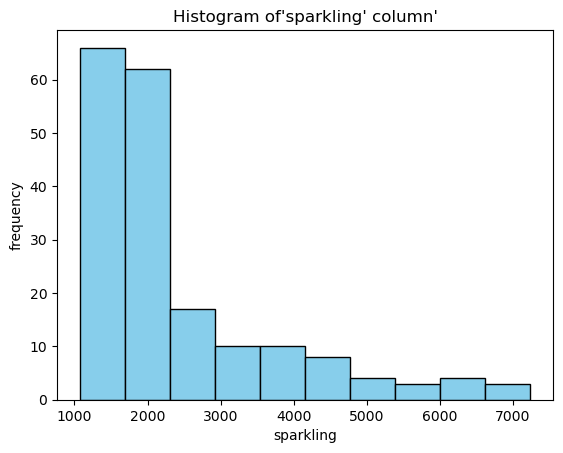

In [108]:
plt.hist(data['Sparkling'],bins=10,color='skyblue',edgecolor='black')
plt.title("Histogram of'sparkling' column'")
plt.xlabel("sparkling")
plt.ylabel("frequency")
plt.show()

In [112]:
monthly_sales=data.groupby(['YearMonth'])['Sparkling'].sum()

In [113]:
#correlation Analysis

In [ ]:
data.corr()

In [116]:
#outliner detection

In [94]:
import matplotlib.pyplot as plt

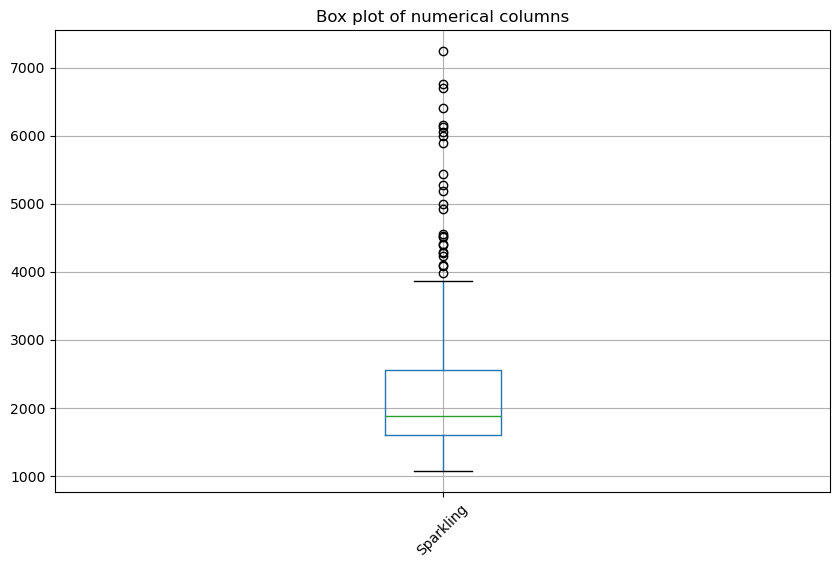

In [95]:
plt.figure(figsize=(10,6))
data.boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

In [104]:
from scipy import stats

In [105]:
#outliers

In [106]:
#calculate z-scores for numerical columns
z_scores = stats.zscore(data.select_dtypes(include='number'))

#threshold for detecting outliers(e.g,z-score greater than 3)
threshold = 3

#find outliers based on the z-score
Outliers = data[(z_scores>threshold).any(axis=1)]

#display the outliers
print("outliers detected using z-score method:")
print(Outliers)

outliers detected using z-score method:
    YearMonth  Sparkling
95    1987-12       7242
107   1988-12       6757
119   1989-12       6694
167   1993-12       6410


In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [5]:
data=pd.read_csv('Sparkling.csv')

C:\Users\jayas\Downloads\Anaco1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jayas\Downloads\Anaco1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


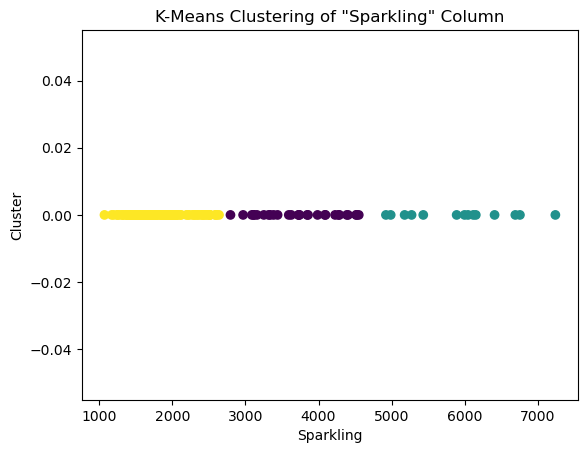

In [6]:
# Assuming 'data' is your DataFrame and 'Sparkling' is one of the columns
# Extracting the column and reshape it to a 1D array 
sparkling_column = data['Sparkling'].values.reshape(-1, 1)

# Choosing the number of clusters 
num_clusters = 3

# Initializing the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fitting the model to the data
kmeans.fit(sparkling_column)

# Getting the cluster labels for each data point
cluster_labels = kmeans.labels_

# Adding the cluster labels to your DataFrame
data['Cluster_Labels'] = cluster_labels

# Visualizing the clusters
plt.scatter(data['Sparkling'], np.zeros_like(data['Sparkling']), c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of "Sparkling" Column')
plt.xlabel('Sparkling')
plt.ylabel('Cluster')
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


C:\Users\jayas\Downloads\Anaco1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jayas\Downloads\Anaco1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


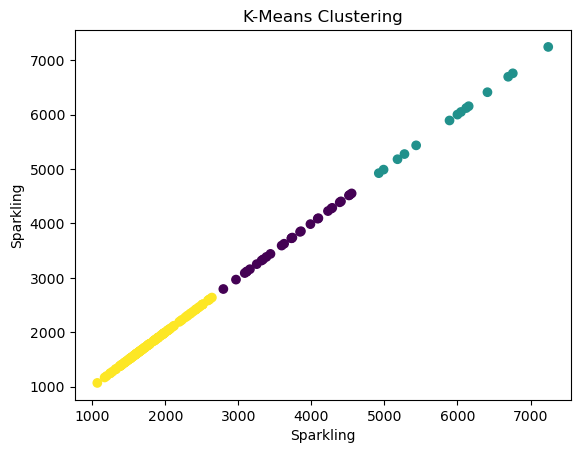

In [11]:
# Assuming 'data' is your DataFrame with numerical columns
# Extracting the numerical columns for clustering
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Choosing the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Initializing the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fitting the model to the scaled data
kmeans.fit(scaled_data)

# Getting the cluster labels for each data point
cluster_labels = kmeans.labels_

# Adding the cluster labels to your DataFrame if needed
data['Cluster_Labels'] = cluster_labels

# Visualizing the clusters (for a pair of columns, adjust as needed)
plt.scatter(data['Sparkling'], data['Sparkling'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Sparkling')
plt.ylabel('Sparkling')
plt.show()
